# Influence of Employment on price of houses

**Authored by**: Dhruvil Mehta

**Duration**: 90 mins

**Level**: Intermediate

**Pre-requisite Skills**: Python, Pandas, Matplotlib

### Scenario
As a data analyst, I want to evaluate the performance of K-Means clustering by analyzing cluster characteristics and validating the quality of clustering through metrics, so that I can ensure the clusters are meaningful and actionable for stakeholders.

### What this use case will teach you
At the end of this use case, you will have demonstrated the following skills:

- Evaluating clustering performance using metrics like Silhouette Score.

- Exploring and visualizing cluster distributions for in-depth analysis.

- Enhancing clustering results by identifying and addressing outliers.

- Communicating insights derived from clustering through detailed visualizations and descriptive analysis.

### Background and Introduction
In this use case, we aim to validate and refine the clustering analysis performed in Week 4. While the initial K-Means clustering provided groupings of regions based on health care employment and median house prices, it is essential to critically evaluate the results to ensure their reliability and interpretability.

Using the clustered dataset from Week 4 (clustered_data_week4.csv), this use case will focus on calculating key performance metrics, such as the Silhouette Score, to assess the quality of the clusters. We will also examine the characteristics of each cluster in greater detail, visualize patterns, and explore methods to handle outliers or refine the clusters as needed.

This process is vital for creating robust and actionable insights, as it helps ensure that the identified patterns are statistically valid and meaningful for guiding decisions in areas such as urban planning, policy-making, and real estate investment.

Clustered Data:
   Census year  Block ID CLUE small area  Accommodation and Food Services  \
0         2018      2501      kensington                              0.0   
1         2018      2501      kensington                              0.0   
2         2018      2501      kensington                              0.0   
3         2018      2501      kensington                              0.0   
4         2018      2501      kensington                              0.0   

   Administrative and Support Services  Agriculture, Forestry and Fishing  \
0                                  0.0                                0.0   
1                                  0.0                                0.0   
2                                  0.0                                0.0   
3                                  0.0                                0.0   
4                                  0.0                                0.0   

   Arts and Recreation Services  Construction  Education a

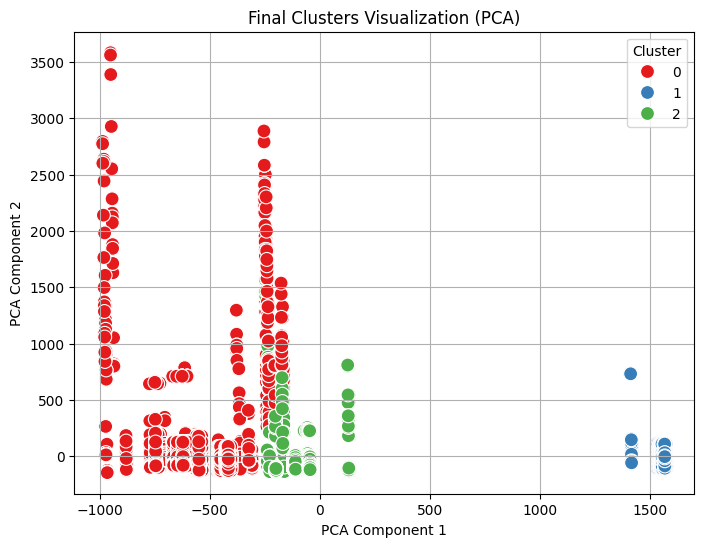

Final Cluster Characteristics:
               Census year     Block ID  Accommodation and Food Services  \
Final_Cluster                                                              
0              2012.031002   479.341615                         0.008161   
1              2014.829032  2516.470968                         0.000000   
2              2011.937905   903.899486                         0.001902   

               Administrative and Support Services  \
Final_Cluster                                        
0                                         0.313315   
1                                         0.000000   
2                                         0.000000   

               Agriculture, Forestry and Fishing  \
Final_Cluster                                      
0                                            0.0   
1                                            0.0   
2                                            0.0   

               Arts and Recreation Services  Constructio

<Figure size 1200x800 with 0 Axes>

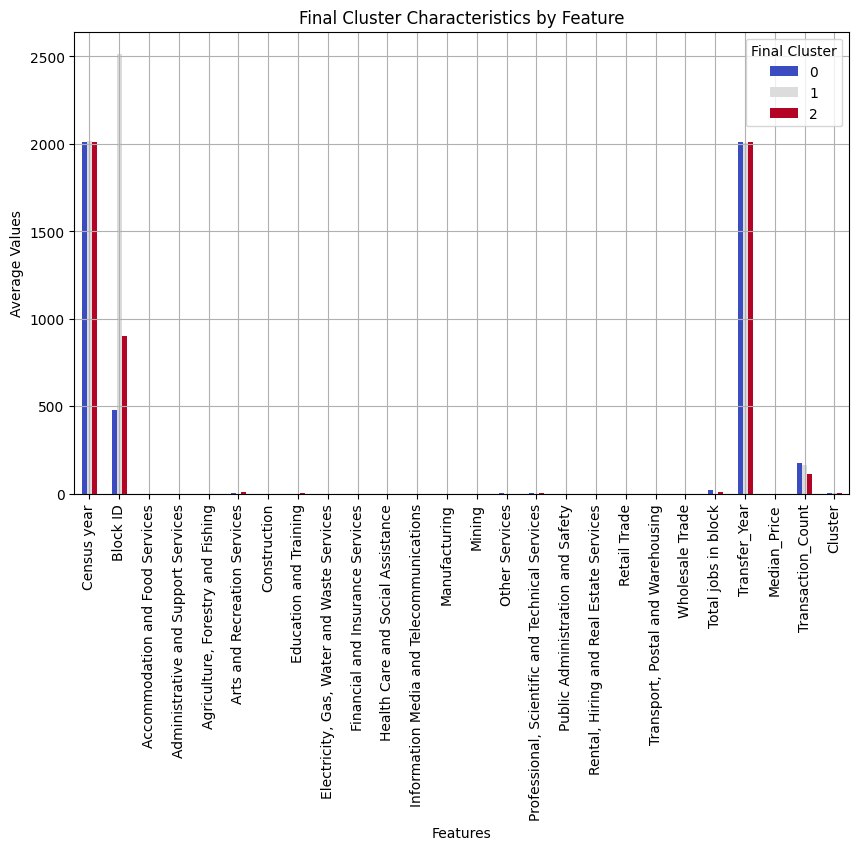

Final clusters saved to 'final_clusters_week5.csv'.


In [1]:
# Step 1: Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA

# Step 2: Loading the Week 4 clustered data
clustered_data = pd.read_csv('clustered_data_week4.csv')

# Step 3: Displaying the first few rows to confirm loading
print("Clustered Data:")
print(clustered_data.head())

# Step 4: Defining features for clustering analysis (numeric columns)
numeric_columns = clustered_data.select_dtypes(include=['float64', 'int64']).columns
features = ['Health Care and Social Assistance', 'Median_Price', 'Cluster']  

# Step 5: Checking if selected features exist in the dataset
missing_features = [feature for feature in features if feature not in clustered_data.columns]
if missing_features:
    print(f"Error: Missing features in dataset: {missing_features}")
    exit()

# Step 6: Applying PCA for dimensionality reduction 
pca = PCA(n_components=2)
pca_data = pca.fit_transform(clustered_data[numeric_columns])
clustered_data['PCA1'] = pca_data[:, 0]
clustered_data['PCA2'] = pca_data[:, 1]

# Step 7: Refining Clustering with Optimal K 
k_optimal = 3  
kmeans_model = KMeans(n_clusters=k_optimal, random_state=42)
clusters = kmeans_model.fit_predict(clustered_data[numeric_columns])

# Step 8: Adding the new cluster labels to the dataset
clustered_data['Final_Cluster'] = clusters

# Step 9: Validating Metrics
silhouette_avg = silhouette_score(clustered_data[numeric_columns], clusters)
davies_bouldin = davies_bouldin_score(clustered_data[numeric_columns], clusters)

print(f"Silhouette Score: {silhouette_avg:.2f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.2f}")

# Step 10: Visualizing Final Clusters with PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=clustered_data['PCA1'],
    y=clustered_data['PCA2'],
    hue=clustered_data['Final_Cluster'],
    palette='Set1',
    s=100
)
plt.title("Final Clusters Visualization (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

# Step 11: Analyzing Cluster Characteristics
final_cluster_means = clustered_data.groupby('Final_Cluster')[numeric_columns].mean()
print("Final Cluster Characteristics:")
print(final_cluster_means)

# Step 12: Visualizing Final Cluster Characteristics
plt.figure(figsize=(12, 8))
final_cluster_means.T.plot(kind='bar', figsize=(10, 6), colormap='coolwarm')
plt.title("Final Cluster Characteristics by Feature")
plt.xlabel("Features")
plt.ylabel("Average Values")
plt.legend(title="Final Cluster")
plt.grid(True)
plt.show()

# Step 13: Saving Final Dataset with Clusters
clustered_data.to_csv('final_clusters_week5.csv', index=False)
print("Final clusters saved to 'final_clusters_week5.csv'.")


### References

- https://data.melbourne.vic.gov.au/explore/dataset/employment-by-block-by-anzsic/information/
- https://data.melbourne.vic.gov.au/explore/dataset/house-prices-by-small-area-transfer-year/information/